Accuracy: 0.91

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       187
           1       0.22      0.15      0.18        13

    accuracy                           0.91       200
   macro avg       0.58      0.56      0.57       200
weighted avg       0.90      0.91      0.90       200



<ipython-input-1-a5fde096694d>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Estado_Credito"], palette="coolwarm")


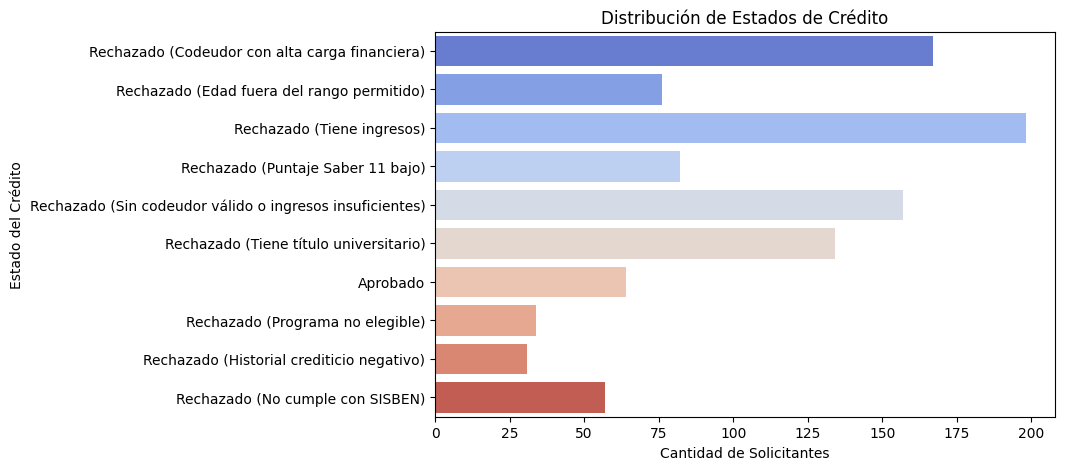

<ipython-input-1-a5fde096694d>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Estado_Credito"], y=df["Edad"], palette="coolwarm")


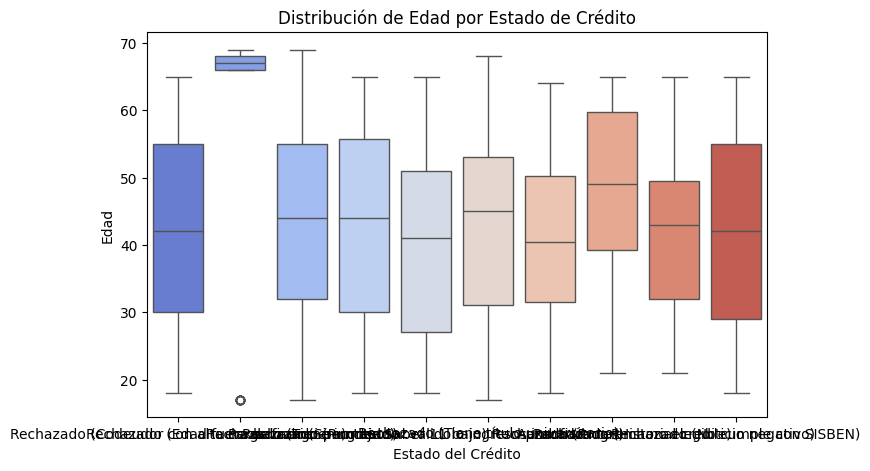

<ipython-input-1-a5fde096694d>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Estado_Credito"], y=df["Pruebas_SABER11"], palette="coolwarm")


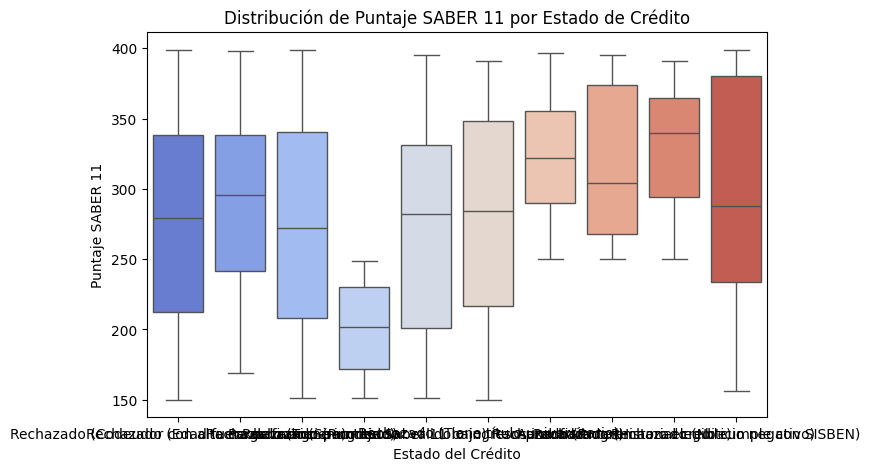

In [ ]:
# Cargar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Cargar el dataset
file_url = "./dataset_credito.csv"
df = pd.read_csv(file_url, encoding="latin1")


# Definir función para evaluar elegibilidad del crédito
def evaluar_credito(row):
    if row["Ingresos"] > 0:
        return "Rechazado (Tiene ingresos)"
    if row["Titulo_Universitario"] == "Sí":
        return "Rechazado (Tiene título universitario)"
    if row["Edad"] < 18 or row["Edad"] > 65:
        return "Rechazado (Edad fuera del rango permitido)"
    if row["SISBEN"] not in ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "B1", "B2", "B3", "B4", "B5", "B6", "B7", "C1", "C2", "C3", "C4", "C5", "C6", "C7"]:
        return "Rechazado (No cumple con SISBEN)"
    if row["Codeudor"] == "No" or row["Ingresos_Codeudor"] < 1000000:
        return "Rechazado (Sin codeudor válido o ingresos insuficientes)"
    if row["Deudas_Codeudor"] > row["Ingresos_Codeudor"] * 0.4:
        return "Rechazado (Codeudor con alta carga financiera)"
    if row["Pruebas_SABER11"] < 250:
        return "Rechazado (Puntaje Saber 11 bajo)"
    if row["Programa"] == "Enfermería":
        return "Rechazado (Programa no elegible)"
    if row["Historial_Credito"] == "Malo":
        return "Rechazado (Historial crediticio negativo)"
    return "Aprobado"

# Aplicar la función
df["Estado_Credito"] = df.apply(evaluar_credito, axis=1)

# Separar características y etiquetas
X = df[["Edad", "Ingresos", "Ingresos_Codeudor", "Deudas_Codeudor", "Pruebas_SABER11", "Ingresos_Familiares"]]
y = (df["Estado_Credito"] == "Aprobado").astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

# Evaluar modelo
y_pred = modelo.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Generar gráficos
plt.figure(figsize=(8, 5))
sns.countplot(y=df["Estado_Credito"], palette="coolwarm")
plt.title("Distribución de Estados de Crédito")
plt.xlabel("Cantidad de Solicitantes")
plt.ylabel("Estado del Crédito")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Estado_Credito"], y=df["Edad"], palette="coolwarm")
plt.title("Distribución de Edad por Estado de Crédito")
plt.xlabel("Estado del Crédito")
plt.ylabel("Edad")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Estado_Credito"], y=df["Pruebas_SABER11"], palette="coolwarm")
plt.title("Distribución de Puntaje SABER 11 por Estado de Crédito")
plt.xlabel("Estado del Crédito")
plt.ylabel("Puntaje SABER 11")
plt.show()